In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("insurance.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape

(1000, 40)

We have 1000 rows and 40 columns in the dataset

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

These are the total columns present in the dataset,where 'fraud_reported' is our target variable

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In df dataset we have string,float and integer type data,hence we need to apply encoding here

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We have null values present in the dataset

In [7]:
df.fraud_reported.unique()

array(['Y', 'N'], dtype=object)

In Target/dependable variable is binary in nature

Income has two type of class i.e,
(i) Y and 
(ii) N

In [9]:
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

Class imbalance is present as in N we have 753 counts and in y we have 247 counts

# APPLY ENCODING

In [10]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [11]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0,NaN
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0.0,5070,780,780,3510,8.0,12.0,2007,1.0,NaN
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0,NaN
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0,NaN
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487.0,2.0,2.0,1000,1310.80,0,431289,...,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0,NaN
996,285,41,186934,129.0,0.0,0.0,1000,1436.79,0,608177,...,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0,NaN
997,130,34,918516,509.0,2.0,1.0,500,1383.49,3000000,442797,...,2.0,67500,7500,7500,52500,11.0,19.0,1996,0.0,NaN
998,458,62,533940,573.0,0.0,2.0,2000,1356.92,5000000,441714,...,2.0,46980,5220,5220,36540,1.0,5.0,1998,0.0,NaN


We convert the datas from string to float type by using  OrdinalEncoder

# STATISTICAL SUMMARY 

In [12]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,...,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000,NaN
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,...,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483,NaN
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000,NaN
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,...,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000,NaN
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000,NaN
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000,NaN
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,...,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000,NaN


Here is the statistical summary of df dataset

Key observation:
 
 1. The mean higher than the median(50th percentile) in columns 'months_as_customer','policy_number','policy_deductable','insured_zip','injury_claim','property_claim','fraud_reported',skewness might be present in these columns
 2. we dont observe extreme difference between the 75th percentile and max in the columns 

# TREAT THE NAN VALUES

In [13]:
df=df.replace(np.nan,0)

In [14]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

We replaced the Null values with 0

# DATA VISUALIZATION 

To check he missing values

<AxesSubplot:>

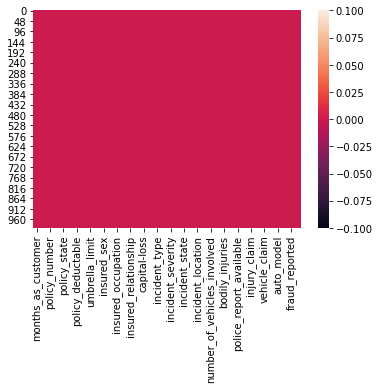

In [15]:
sns.heatmap(df.isnull())

No missing values are present in df dataset

# To check the correlation

In [16]:
cor=df.corr()
cor

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
months_as_customer,1.000000,0.922098,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,...,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544,NaN
age,0.922098,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,...,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143,NaN
policy_number,0.057555,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,...,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443,NaN
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,...,-0.034920,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642,NaN
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,...,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432,NaN
policy_csl,-0.026819,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,...,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190,NaN
policy_deductable,0.026807,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,...,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817,NaN
policy_annual_premium,0.005018,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,...,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480,NaN
umbrella_limit,0.015498,0.018126,0.008968,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,...,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622,NaN
insured_zip,0.017895,0.025604,0.007083,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,...,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368,NaN


<AxesSubplot:>

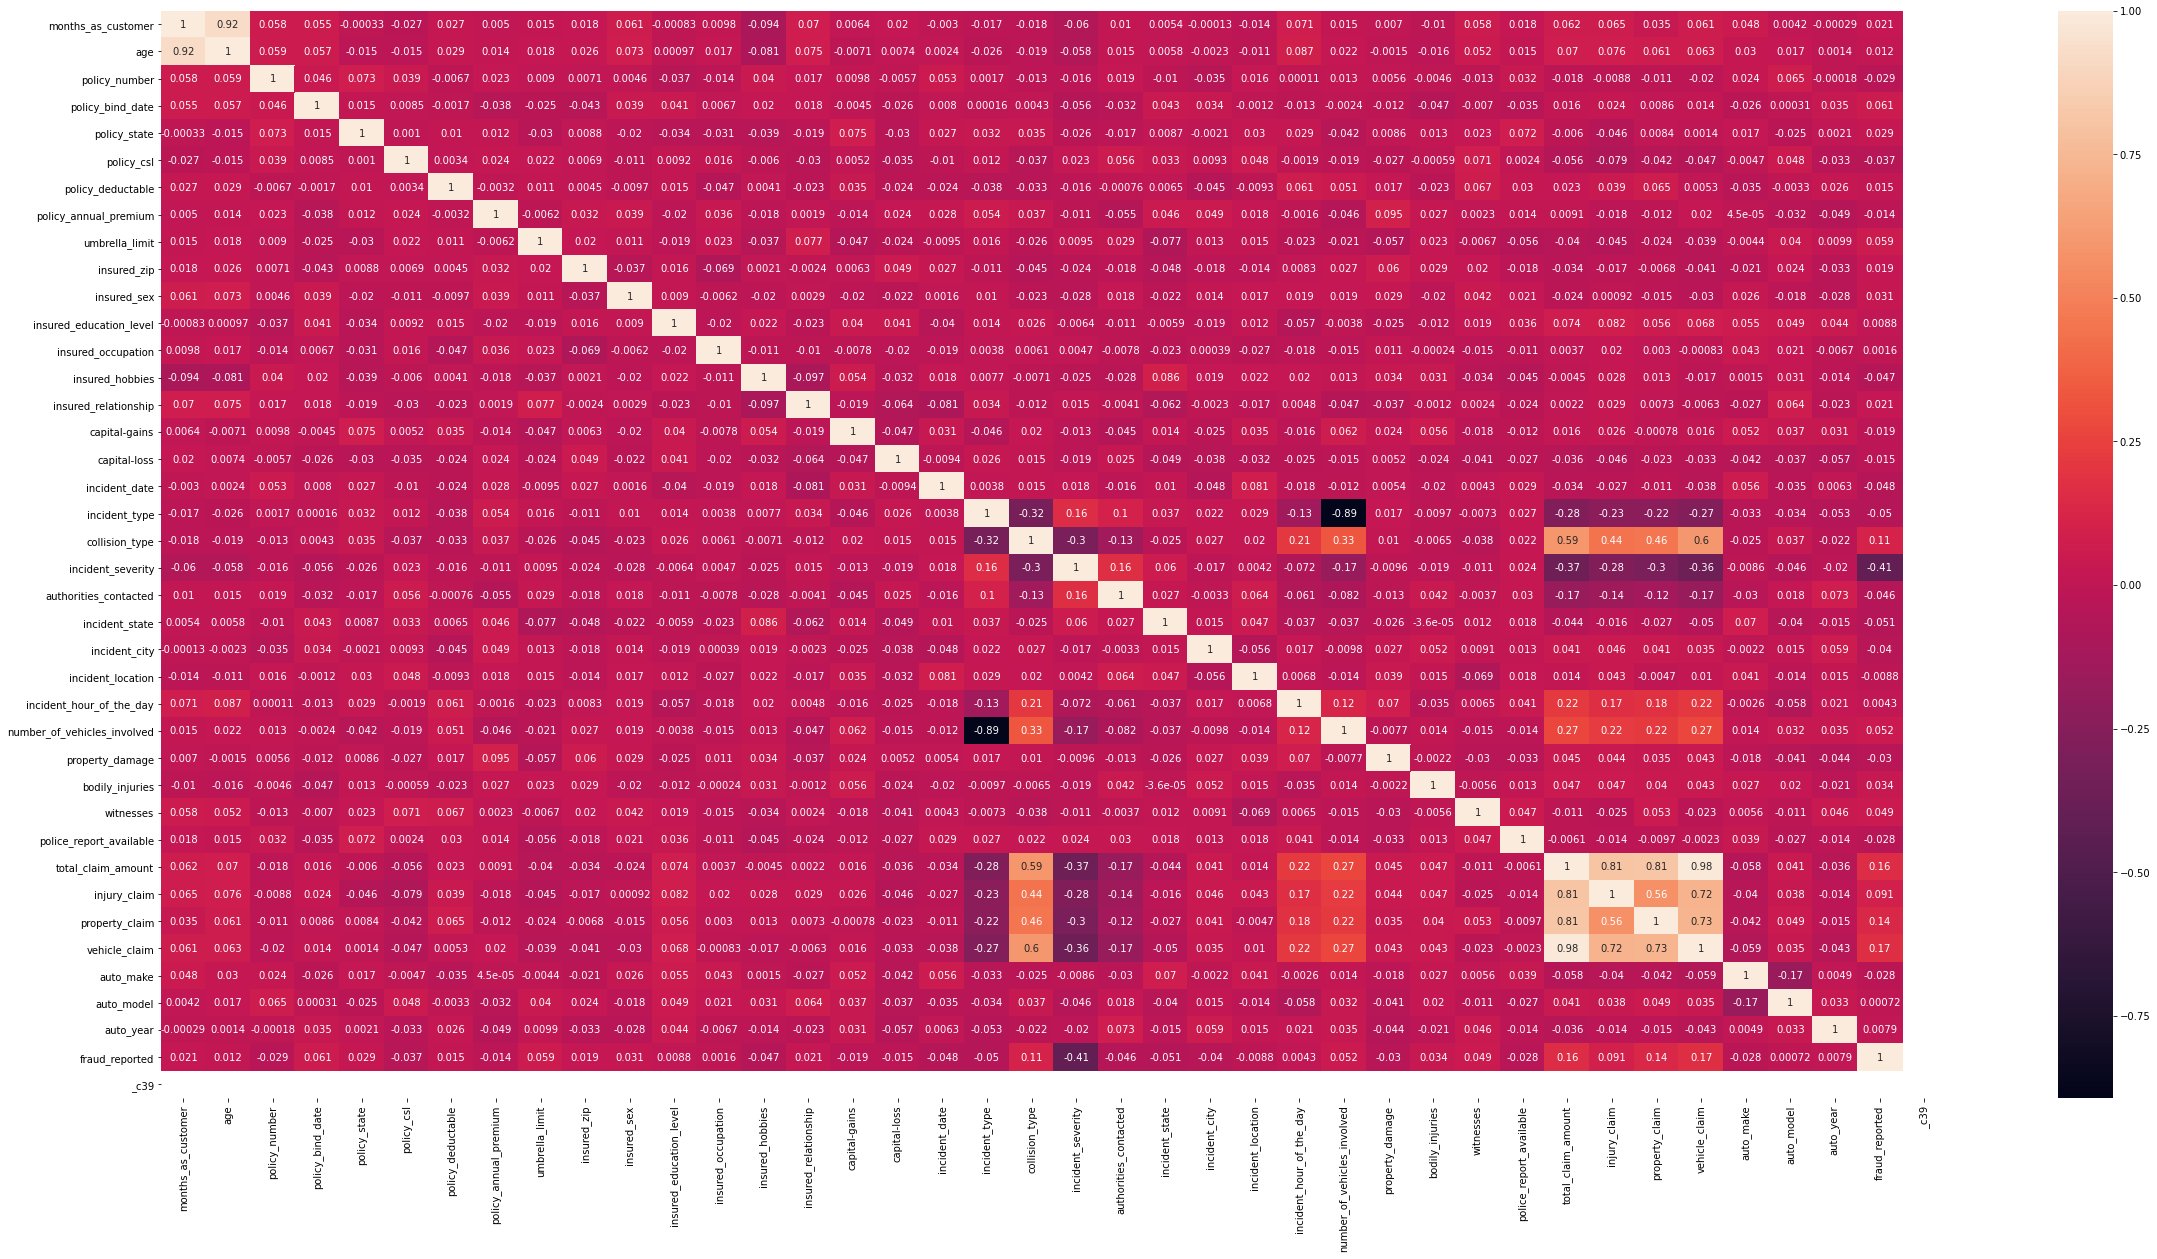

In [17]:
plt.figure(figsize=(40,20))
sns.heatmap(cor,annot=True)

Observation:
    
    Light shades are highly correlated
    "fraud_reported" is negatively correlated with column 'incident_severity' and '_c39' is having no values,hence we can drop it

In [20]:
df.drop(["_c39"],axis=1,inplace=True)

In [21]:
df.shape

(1000, 39)

dropped columns are no longer present in df dataset

# TO CHECK THE COUNT OF DATA IN TARGET COLUMN

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

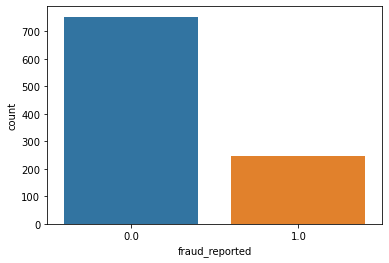

In [19]:
sns.countplot(df["fraud_reported"])

Datas are not equally distributed,class imbalanced present

# TO CHECK THE DISTRIBUTION OF DATA IN COLUMNS

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

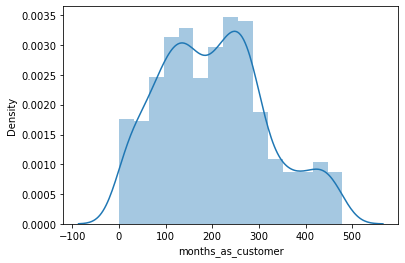

In [22]:
sns.distplot(df["months_as_customer"])

Datas are equally distributed in 'months_as_customer' column

<AxesSubplot:xlabel='age', ylabel='Density'>

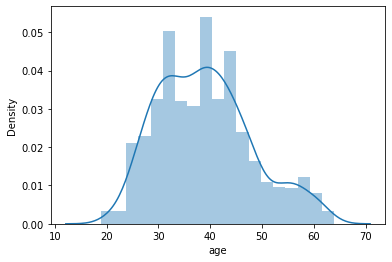

In [23]:
sns.distplot(df["age"])

Datas are equally distributed in 'age' column

<AxesSubplot:xlabel='policy_number', ylabel='Density'>

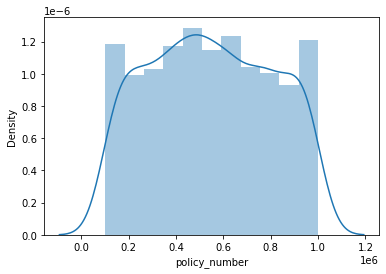

In [24]:
sns.distplot(df["policy_number"])

Datas are equally distributed in 'policy_number' column

<AxesSubplot:xlabel='policy_bind_date', ylabel='Density'>

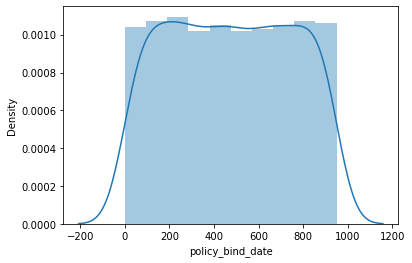

In [25]:
sns.distplot(df["policy_bind_date"])

Datas are equally distributed in 'policy_bind_date' column

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

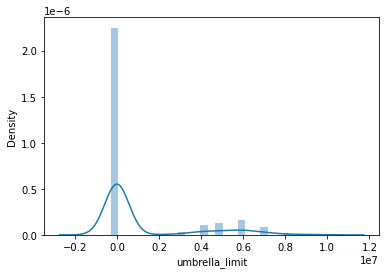

In [26]:
sns.distplot(df["umbrella_limit"])

datas are not equally distributed in "umbrella_limit" column

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

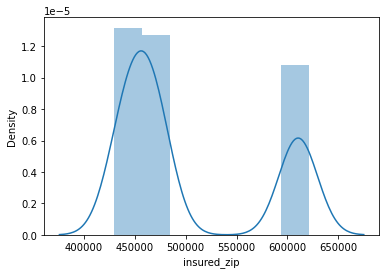

In [27]:
sns.distplot(df["insured_zip"])

datas are not equally distributed in "insured_zip" column

<AxesSubplot:xlabel='insured_education_level', ylabel='Density'>

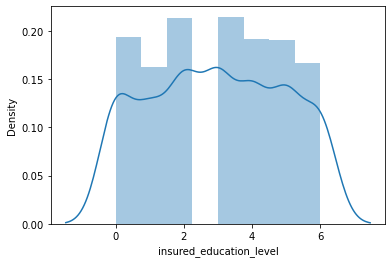

In [29]:
sns.distplot(df["insured_education_level"])

datas are equally distributed in "insured_education_level" column

<AxesSubplot:xlabel='insured_hobbies', ylabel='Density'>

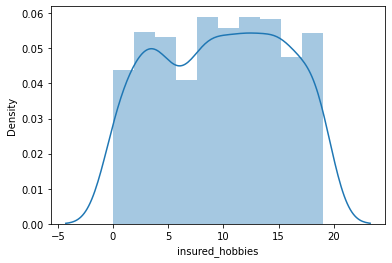

In [30]:
sns.distplot(df["insured_hobbies"])

datas are equally distributed in "insured_hobbies" column

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

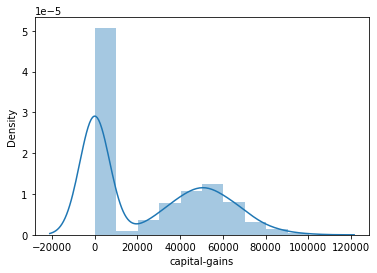

In [32]:
sns.distplot(df["capital-gains"])

datas are not equally distributed in "capital-gains" column

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

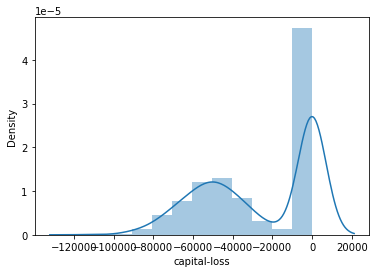

In [33]:
sns.distplot(df["capital-loss"])

datas are not equally distributed in "capital-loss" column

<AxesSubplot:xlabel='incident_type', ylabel='Density'>

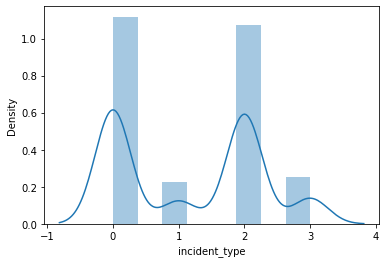

In [34]:
sns.distplot(df["incident_type"])

datas are not equally distributed in "incident_type" column

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='Density'>

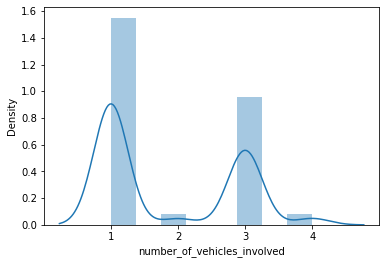

In [35]:
sns.distplot(df["number_of_vehicles_involved"])

datas are not equally distributed in "number_of_vehicles_involved" column

<AxesSubplot:xlabel='bodily_injuries', ylabel='Density'>

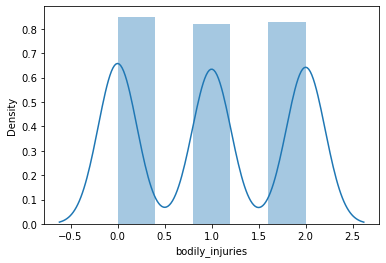

In [36]:
sns.distplot(df["bodily_injuries"])

datas are not equally distributed in "bodily_injuries" column

<AxesSubplot:xlabel='witnesses', ylabel='Density'>

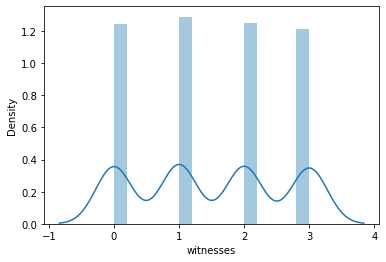

In [37]:
sns.distplot(df["witnesses"])

datas are not equally distributed in "witnesses" column

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

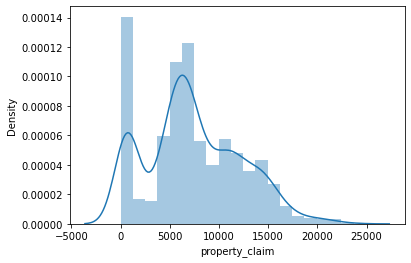

In [38]:
sns.distplot(df["property_claim"])

datas are not equally distributed in "property_claim" column

<AxesSubplot:xlabel='fraud_reported', ylabel='Density'>

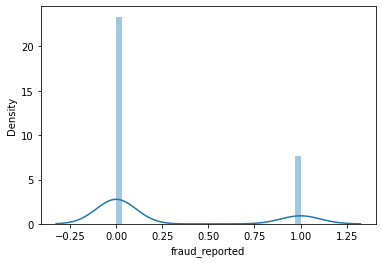

In [39]:
sns.distplot(df["fraud_reported"])

datas are not equally distributed in "fraud_reported" column

# TO CHECK THE FREQUENCY OF THE DATA IN THE COLUMNS

### univariate analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

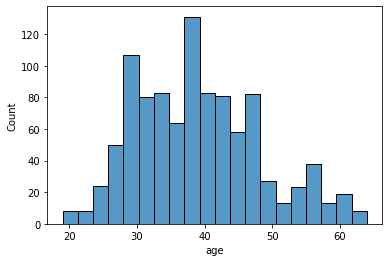

In [41]:
sns.histplot(df["age"],bins=20)

Data spread in column "age" is from 20 to 60

<AxesSubplot:xlabel='umbrella_limit', ylabel='Count'>

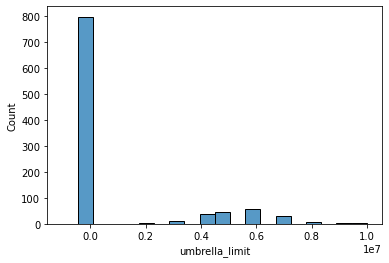

In [42]:
sns.histplot(df["umbrella_limit"],bins=20)

Data spread in column "umbrella_limit" is from 0.0 to 1.0

<AxesSubplot:xlabel='insured_zip', ylabel='Count'>

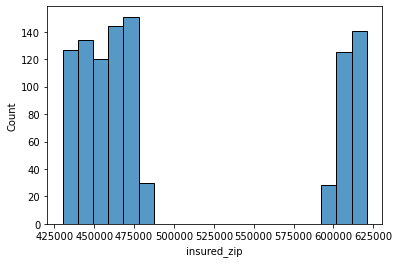

In [43]:
sns.histplot(df["insured_zip"],bins=20)

Data spread in column "insured_zip" is from 425000 to 625000

<AxesSubplot:xlabel='incident_date', ylabel='Count'>

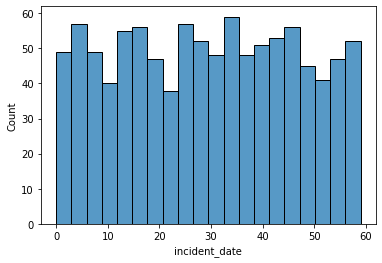

In [44]:
sns.histplot(df["incident_date"],bins=20)

Data spread in column "insured_date" is from 0 to 60

<AxesSubplot:xlabel='property_damage', ylabel='Count'>

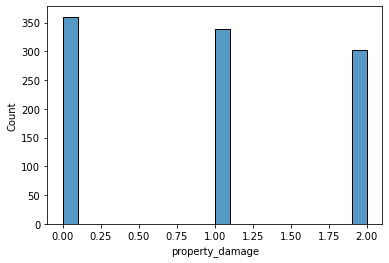

In [45]:
sns.histplot(df["property_damage"],bins=20)

Data spread in column "property_damage" is 0.00,1.00,2.00

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

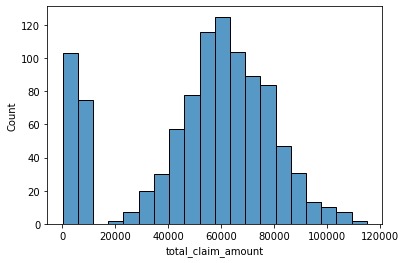

In [46]:
sns.histplot(df["total_claim_amount"],bins=20)

Data spread in column "total_claim_amount" is from 0 to 120000

<AxesSubplot:xlabel='fraud_reported', ylabel='Count'>

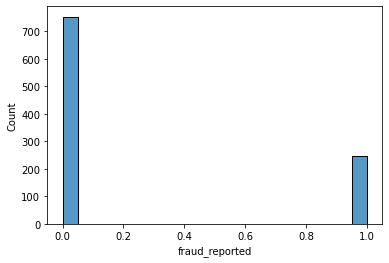

In [47]:
sns.histplot(df["fraud_reported"],bins=20)

Data spread in column "fraud_reported" is between 0.0 to 1.0

# TO CHECK THE RELATION OF EACH COLUMN TARGET VARIABLE

<AxesSubplot:xlabel='age', ylabel='fraud_reported'>

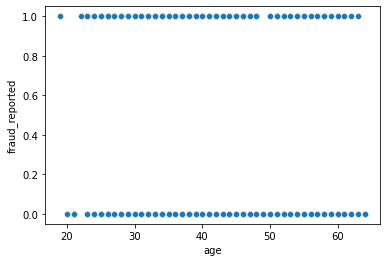

In [49]:
sns.scatterplot(x="age",y="fraud_reported",data=df)

High Data spread is between 20 to 65

<AxesSubplot:xlabel='policy_bind_date', ylabel='fraud_reported'>

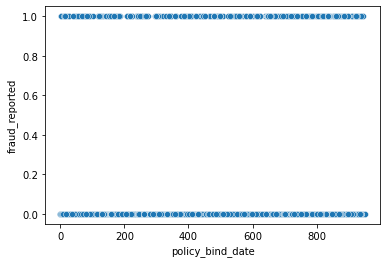

In [50]:
sns.scatterplot(x="policy_bind_date",y="fraud_reported",data=df)

High Data spread is between 0 to 900

<AxesSubplot:xlabel='policy_csl', ylabel='fraud_reported'>

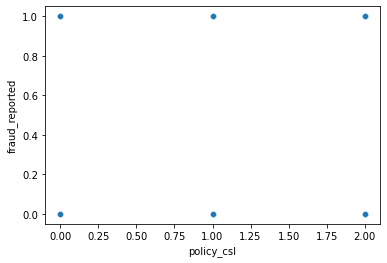

In [51]:
sns.scatterplot(x="policy_csl",y="fraud_reported",data=df)

High Data spread is between 0.00,1.00 and 2.00

<AxesSubplot:xlabel='insured_zip', ylabel='fraud_reported'>

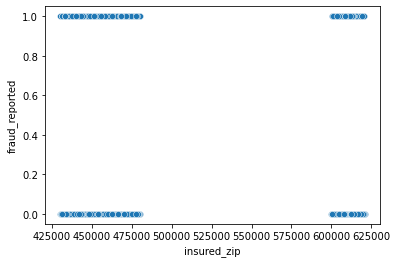

In [52]:
sns.scatterplot(x="insured_zip",y="fraud_reported",data=df)

High Data spread is between 425000 to 625000

<AxesSubplot:xlabel='insured_sex', ylabel='fraud_reported'>

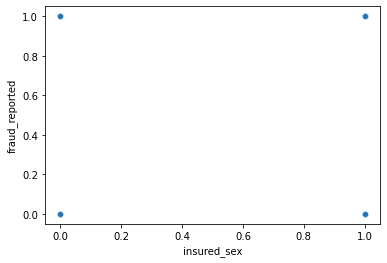

In [53]:
sns.scatterplot(x="insured_sex",y="fraud_reported",data=df)

High Data spread is between 0.0 and 1.0

<AxesSubplot:xlabel='insured_occupation', ylabel='fraud_reported'>

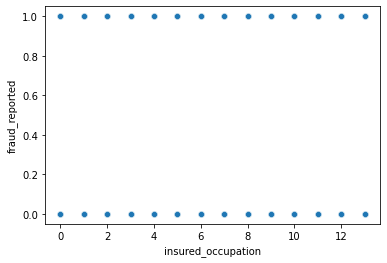

In [54]:
sns.scatterplot(x="insured_occupation",y="fraud_reported",data=df)

High Data spread is between 0 tp 13

<AxesSubplot:xlabel='incident_date', ylabel='fraud_reported'>

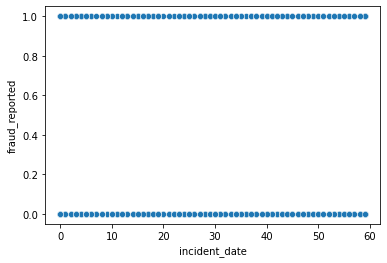

In [55]:
sns.scatterplot(x="incident_date",y="fraud_reported",data=df)

High Data spread is between 0 to 60

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='fraud_reported'>

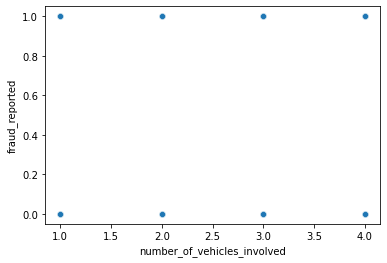

In [58]:
sns.scatterplot(x="number_of_vehicles_involved",y="fraud_reported",data=df)

High Data spread is between 1.0,2.0,3.0,4.0

<AxesSubplot:xlabel='bodily_injuries', ylabel='fraud_reported'>

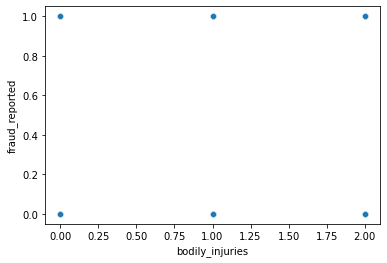

In [59]:
sns.scatterplot(x="bodily_injuries",y="fraud_reported",data=df)

High Data spread is between 0.0,1.0 and 2.00

<AxesSubplot:xlabel='witnesses', ylabel='fraud_reported'>

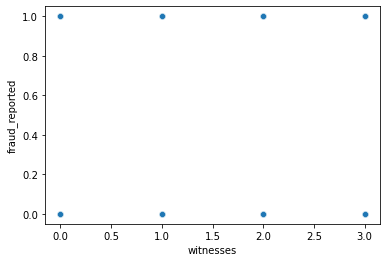

In [60]:
sns.scatterplot(x="witnesses",y="fraud_reported",data=df)

High Data spread is between 0.0,1.0,2.0 to 3.0

<AxesSubplot:xlabel='vehicle_claim', ylabel='fraud_reported'>

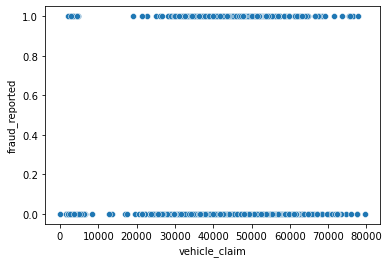

In [61]:
sns.scatterplot(x="vehicle_claim",y="fraud_reported",data=df)

High Data spread is between 0.0 to 80000

<AxesSubplot:xlabel='auto_make', ylabel='fraud_reported'>

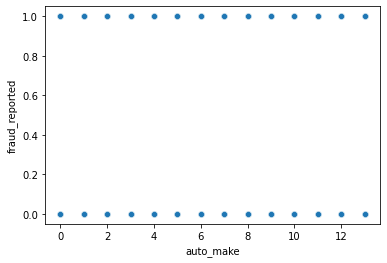

In [63]:
sns.scatterplot(x="auto_make",y="fraud_reported",data=df)

High Data spread is between 0 to 13

<AxesSubplot:xlabel='auto_model', ylabel='fraud_reported'>

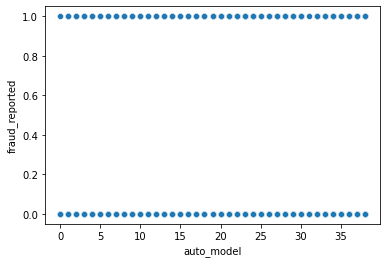

In [64]:
sns.scatterplot(x="auto_model",y="fraud_reported",data=df)

High Data spread is between 0 to 40

<AxesSubplot:xlabel='auto_year', ylabel='fraud_reported'>

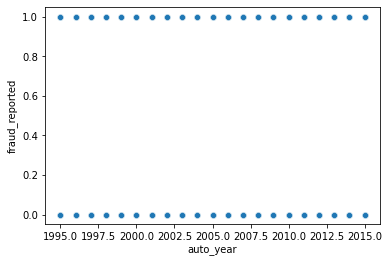

In [65]:
sns.scatterplot(x="auto_year",y="fraud_reported",data=df)

High Data spread is between 1995.0 to 2015.0

# REMOVING OUTLIERS

In [67]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.07813958, 0.99083647, 0.09595307, ..., 1.64574255, 0.1834404 ,
        1.74601919],
       [0.2089946 , 0.33407345, 0.79152739, ..., 0.65747047, 0.31549088,
        1.74601919],
       [0.60800168, 1.08891308, 0.55056594, ..., 0.95970204, 0.31549088,
        0.57273139],
       ...,
       [0.64276748, 0.54161057, 1.44891961, ..., 0.02857005, 1.5139238 ,
        0.57273139],
       [2.20802805, 2.52328351, 0.04786687, ..., 1.28637088, 1.18130295,
        0.57273139],
       [2.19064515, 2.3043625 , 0.03830297, ..., 0.65747047, 0.31549088,
        0.57273139]])

In [68]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 33,  8,  8,  8,  7, 16,
        8,  8,  8], dtype=int64))


In [69]:
df_new=df[(z<3).all(axis=1)]
df_new

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,3,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,2,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487.0,2.0,2.0,1000,1310.80,0,431289,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0
996,285,41,186934,129.0,0.0,0.0,1000,1436.79,0,608177,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0
997,130,34,918516,509.0,2.0,1.0,500,1383.49,3000000,442797,...,3,2.0,67500,7500,7500,52500,11.0,19.0,1996,0.0
998,458,62,533940,573.0,0.0,2.0,2000,1356.92,5000000,441714,...,1,2.0,46980,5220,5220,36540,1.0,5.0,1998,0.0


In [70]:
df.shape

(1000, 39)

In [71]:
20/1000

0.02

We have lost 2% data by removing outliers

In [72]:
df=df_new
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,3,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,2,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487.0,2.0,2.0,1000,1310.80,0,431289,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0
996,285,41,186934,129.0,0.0,0.0,1000,1436.79,0,608177,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0
997,130,34,918516,509.0,2.0,1.0,500,1383.49,3000000,442797,...,3,2.0,67500,7500,7500,52500,11.0,19.0,1996,0.0
998,458,62,533940,573.0,0.0,2.0,2000,1356.92,5000000,441714,...,1,2.0,46980,5220,5220,36540,1.0,5.0,1998,0.0


# DIVIDING THE COLUMNS AS x AND y

In [73]:
x=df.drop("fraud_reported",axis=1)
y=df["fraud_reported"]

# APPLYING variance_inflation_factor

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
x.shape[1]

38

In [76]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [77]:
vif_calc()

    VIF FACTOR                     features
0    28.599636           months_as_customer
1   131.669557                          age
2     5.675367                policy_number
3     4.063575             policy_bind_date
4     2.601601                 policy_state
5     2.454557                   policy_csl
6     4.649686            policy_deductable
7    29.243942        policy_annual_premium
8     1.264987               umbrella_limit
9    52.010127                  insured_zip
10    1.921481                  insured_sex
11    3.432915      insured_education_level
12    3.815493           insured_occupation
13    4.124017              insured_hobbies
14    3.228477         insured_relationship
15    1.886737                capital-gains
16    1.986067                 capital-loss
17    4.051819                incident_date
18   11.286727                incident_type
19    5.919033               collision_type
20    3.132367            incident_severity
21    3.207890        authoritie

Multicollinearity is visible,we need to drop column "incident_city","authorities_contacted","incident_state","auto_make","police_report_available","policy_csl","policy_state","policy_annual_premium","capital-gains","capital-loss",as these are having less values

In [79]:
df.drop(["incident_city","authorities_contacted","incident_state","auto_make","police_report_available","policy_csl","policy_state","policy_annual_premium","capital-gains","capital-loss"],axis=1,inplace=True)

In [80]:
df.shape

(980, 29)

Dropped columns are no longer present in df dataset

# REMOVING THE SKEWNESS 

In [81]:
df.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_bind_date               0.006386
policy_deductable              0.476090
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
incident_date                  0.002604
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
incident_location             -0.003369
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.101196
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356


In [82]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

In [83]:
x

array([[ 1.04454111,  1.0023305 , -0.02347493, ...,  0.85481164,
        -1.80721231, -0.20443508],
       [ 0.29904549,  0.42717141, -0.74401221, ...,  0.41187331,
        -0.57848628,  0.29587688],
       [-0.51581942, -1.13601305,  0.58680474, ..., -0.56458381,
         0.9504262 ,  0.29587688],
       ...,
       [-0.55427228, -0.47059792,  1.37172562, ...,  1.06823592,
         0.05320514, -1.49935977],
       [ 1.90408801,  2.12107486,  0.02357929, ..., -1.44793034,
        -1.29996796, -1.18090064],
       [ 1.89156317,  1.97656406,  0.10716503, ...,  0.41187331,
        -0.57848628,  0.29587688]])

Applied power_transform method to remove the skewness 

# APPLYING SMOTE TECHNIQUE FOR IMBALANCED DATA

In [84]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [86]:
train_x,train_y=smt.fit_resample(x,y)

In [87]:
train_y.value_counts()

0.0    740
1.0    740
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

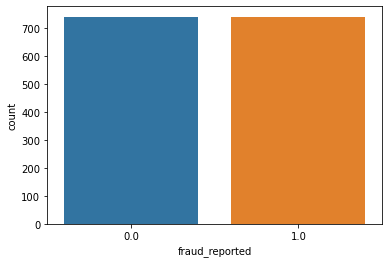

In [88]:
sns.countplot(train_y)

By using smote technique we make the target data balanced 

# APPLYING SCALING

In [89]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.04454111,  1.0023305 , -0.02347493, ...,  0.85481164,
        -1.80721231, -0.20443508],
       [ 0.29904549,  0.42717141, -0.74401221, ...,  0.41187331,
        -0.57848628,  0.29587688],
       [-0.51581942, -1.13601305,  0.58680474, ..., -0.56458381,
         0.9504262 ,  0.29587688],
       ...,
       [-0.55427228, -0.47059792,  1.37172562, ...,  1.06823592,
         0.05320514, -1.49935977],
       [ 1.90408801,  2.12107486,  0.02357929, ..., -1.44793034,
        -1.29996796, -1.18090064],
       [ 1.89156317,  1.97656406,  0.10716503, ...,  0.41187331,
        -0.57848628,  0.29587688]])

In [90]:
x

array([[ 1.04454111,  1.0023305 , -0.02347493, ...,  0.85481164,
        -1.80721231, -0.20443508],
       [ 0.29904549,  0.42717141, -0.74401221, ...,  0.41187331,
        -0.57848628,  0.29587688],
       [-0.51581942, -1.13601305,  0.58680474, ..., -0.56458381,
         0.9504262 ,  0.29587688],
       ...,
       [-0.55427228, -0.47059792,  1.37172562, ...,  1.06823592,
         0.05320514, -1.49935977],
       [ 1.90408801,  2.12107486,  0.02357929, ..., -1.44793034,
        -1.29996796, -1.18090064],
       [ 1.89156317,  1.97656406,  0.10716503, ...,  0.41187331,
        -0.57848628,  0.29587688]])

applying scaling technique to make all the data even 

# APPLYING VARIOUS MODEL TO GET THE BEST ACCURACY SCORE

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()
from sklearn.metrics import accuracy_score 

In [92]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=202)

In [93]:
lr.fit(train_x,train_y)
pred_train=lr.predict(train_x)
pred_test=lr.predict(test_x)
from sklearn.metrics import classification_report
print(classification_report(test_y,pred_test))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88       157
         1.0       0.53      0.49      0.51        39

    accuracy                           0.81       196
   macro avg       0.70      0.69      0.69       196
weighted avg       0.81      0.81      0.81       196



By applying LogisticRegression we are getting the accuracy of 0.81

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

In [95]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
pred=dtc.predict(test_x)
acc=classification_report(test_y,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88       157
         1.0       0.53      0.64      0.58        39

    accuracy                           0.82       196
   macro avg       0.72      0.75      0.73       196
weighted avg       0.83      0.82      0.82       196



By applying DecisionTreeClassifier we are getting the accuracy of 0.82

In [96]:
rfc=RandomForestClassifier()
rfc.fit(train_x,train_y)
pred=rfc.predict(test_x)
acc=classification_report(test_y,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       157
         1.0       0.50      0.44      0.47        39

    accuracy                           0.80       196
   macro avg       0.68      0.66      0.67       196
weighted avg       0.79      0.80      0.80       196



We are getting the accuracy of 0.80 by using RandomForestClassifier

In [97]:
svc=SVC()
svc.fit(train_x,train_y)
pred=svc.predict(test_x)
acc=classification_report(test_y,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       157
         1.0       0.44      0.21      0.28        39

    accuracy                           0.79       196
   macro avg       0.64      0.57      0.58       196
weighted avg       0.75      0.79      0.76       196



We are getting the accuracy of 0.79 by using SupportVectorClassifier

# KNeighborsClassifier

In [98]:
knn=KNeighborsClassifier()
knn.fit(train_x,train_y)
pred=knn.predict(test_x)
acc=classification_report(test_y,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       157
         1.0       0.30      0.21      0.24        39

    accuracy                           0.74       196
   macro avg       0.56      0.54      0.54       196
weighted avg       0.71      0.74      0.73       196



We are getting the accuracy of 0.74 by using KNeighborsClassifier

# CHECKING THE CROSS VALIDATION SCORE WITH ACCURACY SCORE

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
cv=cross_val_score(lr,x,y,cv=4).mean()
print(cv)

0.7887755102040817


In [101]:
cv=cross_val_score(rfc,x,y,cv=4).mean()
print(cv)

0.7663265306122449


In [102]:
cv=cross_val_score(dtc,x,y,cv=4).mean()
print(cv)

0.7846938775510205


In [103]:
cv=cross_val_score(svc,x,y,cv=4).mean()
print(cv)

0.7530612244897958


In [104]:
cv=cross_val_score(knn,x,y,cv=4).mean()
print(cv)

0.726530612244898


LogisticRegression is providing the best accuracy_score as its has less difference between the accuracy score and cv score

# AUC ROC CURVE

In [105]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [106]:
y_pred_prob=lr.predict_proba(test_x)[:,1]
y_pred_prob

array([0.58690604, 0.36869303, 0.33103028, 0.24585921, 0.11484524,
       0.56398246, 0.08392103, 0.13024035, 0.43284479, 0.2149039 ,
       0.2265215 , 0.21775872, 0.40209035, 0.09613557, 0.70535209,
       0.47190721, 0.1068808 , 0.18200349, 0.51767038, 0.02267311,
       0.2162664 , 0.13035748, 0.67864555, 0.0623344 , 0.09027294,
       0.14664254, 0.2422254 , 0.76063062, 0.01534107, 0.27873863,
       0.5735528 , 0.28930251, 0.27100435, 0.71169006, 0.0704967 ,
       0.19523815, 0.01809439, 0.1093904 , 0.69004247, 0.61200385,
       0.05405086, 0.02806549, 0.60709908, 0.50287839, 0.03611089,
       0.57542408, 0.03179415, 0.08962306, 0.06231201, 0.48121802,
       0.1035156 , 0.14188566, 0.12201847, 0.38621195, 0.03143409,
       0.5429491 , 0.19588487, 0.55148417, 0.50504939, 0.03164809,
       0.21383259, 0.83696891, 0.18186856, 0.42978732, 0.12684399,
       0.42241464, 0.12626788, 0.13803802, 0.21778034, 0.04499612,
       0.83138775, 0.23121078, 0.33868156, 0.53444556, 0.04754

In [107]:
fpr,tpr,threshold=roc_curve(test_y,y_pred_prob)

In [108]:
fpr

array([0.        , 0.        , 0.        , 0.00636943, 0.00636943,
       0.01273885, 0.01273885, 0.03184713, 0.03184713, 0.04458599,
       0.04458599, 0.06369427, 0.06369427, 0.10828025, 0.10828025,
       0.11464968, 0.11464968, 0.12101911, 0.12101911, 0.12738854,
       0.12738854, 0.14012739, 0.14012739, 0.1656051 , 0.1656051 ,
       0.1910828 , 0.1910828 , 0.20382166, 0.20382166, 0.29936306,
       0.29936306, 0.66242038, 0.66242038, 0.68789809, 0.68789809,
       0.69426752, 0.69426752, 0.74522293, 0.74522293, 0.75796178,
       0.75796178, 0.84076433, 0.84076433, 0.91719745, 0.91719745,
       1.        ])

In [109]:
tpr

array([0.        , 0.02564103, 0.07692308, 0.07692308, 0.15384615,
       0.15384615, 0.20512821, 0.20512821, 0.23076923, 0.23076923,
       0.28205128, 0.28205128, 0.33333333, 0.33333333, 0.48717949,
       0.48717949, 0.53846154, 0.53846154, 0.61538462, 0.61538462,
       0.66666667, 0.66666667, 0.69230769, 0.69230769, 0.71794872,
       0.71794872, 0.74358974, 0.74358974, 0.76923077, 0.76923077,
       0.79487179, 0.79487179, 0.84615385, 0.84615385, 0.87179487,
       0.87179487, 0.8974359 , 0.8974359 , 0.92307692, 0.92307692,
       0.94871795, 0.94871795, 0.97435897, 0.97435897, 1.        ,
       1.        ])

In [110]:
threshold

array([1.83696891, 0.83696891, 0.76063062, 0.71169006, 0.70076025,
       0.69671822, 0.69004247, 0.66994349, 0.66973218, 0.64655937,
       0.61200385, 0.60709908, 0.58690604, 0.5429491 , 0.50287839,
       0.48121802, 0.47190721, 0.46489707, 0.43653996, 0.43284479,
       0.42241464, 0.40209035, 0.39720056, 0.36283101, 0.33868156,
       0.32632902, 0.29701373, 0.28930251, 0.28510862, 0.23519448,
       0.23121078, 0.1093904 , 0.10638707, 0.09657527, 0.09613557,
       0.09438771, 0.0942504 , 0.08148093, 0.08004642, 0.07435785,
       0.07339639, 0.04892632, 0.04754728, 0.03337437, 0.03255924,
       0.00713868])

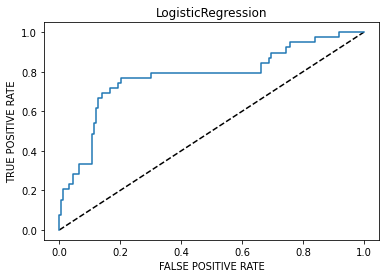

In [111]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="LogisticRegression")
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("LogisticRegression")
plt.show()

Plotted the auc roc curve of the best model LogisticRegression 

# SAVING THE BEST MODEL

In [112]:
import joblib
joblib.dump(lr,"best_lr_insurancefile.obj")

['best_lr_insurancefile.obj']